In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Loading Train Data and Test Data

In [ ]:
with open('/content/drive/MyDrive/archive (3)/Genre Classification Dataset/train_data.txt', 'r') as file:
    train_data = file.read()

# Split the data
train_rows = [re.split(' ::: ', row) for row in train_data.split('\n') if row]

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/archive (3)/Genre Classification Dataset/train_data.txt',sep=' ::: ',header=None,engine='python', names=['Title','Genre','Description'])
train_data

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...
...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on B...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The siste...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about gr..."
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and have...


In [ ]:
test_data = pd.read_csv('/content/drive/MyDrive/archive (3)/Genre Classification Dataset/test_data.txt',sep=' ::: ',header=None,engine='python', names=['Title','Description'])
test_data

,Title,Description
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apart..."
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty chi..."
3,Off the Beaten Track (2010),One year in the life of Albin and his family o...
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with his..."
5,Er nu zhai (1955),Before he was known internationally as a marti...
...,...,...
54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Dar..."
54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their ...
54198,Oliver Twink (2007),"A movie 169 years in the making. Oliver Twist,..."
54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard ..."


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [ ]:
cat_cols = train_data.select_dtypes(include='object').columns
summary_stats = train_data[cat_cols].describe()

print("Summary Statistics for Categorical Columns:")
print(summary_stats)

Summary Statistics for Categorical Columns:
                               Title  Genre  \
count                          54214  54214   
unique                         54214     27   
top     Oscar et la dame rose (2009)  drama   
freq                               1  13613   

                                              Description  
count                                               54214  
unique                                              54086  
top     Grammy - music award of the American academy o...  
freq                                                   12  


In [ ]:
train_data['Genre'].value_counts()


Genre
drama          13613
documentary    13096
comedy          7447
short           5073
horror          2204
thriller        1591
action          1315
western         1032
reality-tv       884
family           784
adventure        775
music            731
romance          672
sci-fi           647
adult            590
crime            505
animation        498
sport            432
talk-show        391
fantasy          323
mystery          319
musical          277
biography        265
history          243
game-show        194
news             181
war              132
Name: count, dtype: int64

In [ ]:
train_data['Title'].value_counts()


Title
Oscar et la dame rose (2009)                  1
Zauber der Boheme (1937)                      1
To Love and to Cherish (2012)                 1
Adult Prom (????)                             1
Arai Enn 305-il Kadavul (2008)                1
                                             ..
Jureks Kino (2006)                            1
Werk it, Bro (2016)                           1
Vers le sud (2005)                            1
Les beaux souvenirs (1981)                    1
Nature's Fury: Storm of the Century (2006)    1
Name: count, Length: 54214, dtype: int64

In [ ]:
train_data['Description'].value_counts()

Description
Grammy - music award of the American academy of the audio recording, was founded by the American association of sound-recording companies of March, 14, 1958. Grammy is awarded annually as a result of voting by the authorized members of "Recording Academy".                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [ ]:
num_rows, num_cols = train_data.shape
print("\nTotal rows: {} | Total columns: {}".format(num_rows, num_cols))


Total rows: 54214 | Total columns: 3


In [ ]:
train_data.isnull().sum()

Title          0
Genre          0
Description    0
dtype: int64

# Data Visualization

<ipython-input-12-632bbc664df4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Genre', data=train_data, palette='viridis')


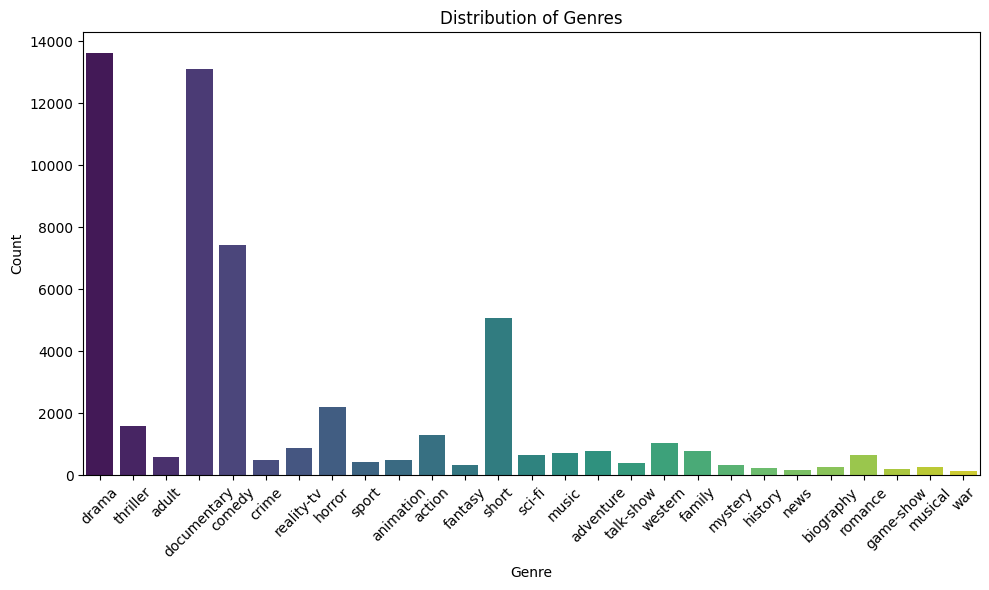

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Genre', data=train_data, palette='viridis')
plt.title('Distribution of Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Data Cleaning

In [ ]:
train_data['Description'] = train_data['Description'].str.lower().copy()

train_data_clean = train_data.copy()

In [ ]:
def atSignRemove(x):
    x = re.sub('[@,<,?,&,*,#,%,]+\w+', '',x)
    return x
train_data_clean['Description'] = train_data_clean['Description'].apply(atSignRemove)
train_data_clean

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,listening in to a conversation between his doc...
2,Cupid (1997),thriller,a brother and sister with a past incestuous re...
3,"Young, Wild and Wonderful (1980)",adult,as the bus empties the students for their fiel...
4,The Secret Sin (1915),drama,to help their unemployed father make ends meet...
5,The Unrecovered (2007),drama,the film's title refers not only to the un-rec...
...,...,...,...
54210,"""Bonino"" (1953)",comedy,this short-lived nbc live sitcom centered on b...
54211,Dead Girls Don't Cry (????),horror,the next generation of exploitation. the siste...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"ze bestaan echt, is a stand-up comedy about gr..."
54213,Make Your Own Bed (1944),comedy,walter and vivian live in the country and have...


In [ ]:
def charactersAlone(x):
    x = re.sub(r"[^a-zA-Z+']", ' ', x)
    return x
train_data_clean['Description'] = train_data_clean['Description'].apply(charactersAlone)
train_data_clean

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,listening in to a conversation between his doc...
2,Cupid (1997),thriller,a brother and sister with a past incestuous re...
3,"Young, Wild and Wonderful (1980)",adult,as the bus empties the students for their fiel...
4,The Secret Sin (1915),drama,to help their unemployed father make ends meet...
5,The Unrecovered (2007),drama,the film's title refers not only to the un rec...
...,...,...,...
54210,"""Bonino"" (1953)",comedy,this short lived nbc live sitcom centered on b...
54211,Dead Girls Don't Cry (????),horror,the next generation of exploitation the siste...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,ze bestaan echt is a stand up comedy about gr...
54213,Make Your Own Bed (1944),comedy,walter and vivian live in the country and have...


In [ ]:
def removeLinks(x):
    x = re.sub(r'http\S+', '', x)
    return x
train_data_clean['Description'] = train_data_clean['Description'].apply(removeLinks)
train_data_clean

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,listening in to a conversation between his doc...
2,Cupid (1997),thriller,a brother and sister with a past incestuous re...
3,"Young, Wild and Wonderful (1980)",adult,as the bus empties the students for their fiel...
4,The Secret Sin (1915),drama,to help their unemployed father make ends meet...
5,The Unrecovered (2007),drama,the film's title refers not only to the un rec...
...,...,...,...
54210,"""Bonino"" (1953)",comedy,this short lived nbc live sitcom centered on b...
54211,Dead Girls Don't Cry (????),horror,the next generation of exploitation the siste...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,ze bestaan echt is a stand up comedy about gr...
54213,Make Your Own Bed (1944),comedy,walter and vivian live in the country and have...


In [ ]:
import string
string.punctuation
def avoidPunctuation(x):
    x = "".join([i for i in x if i not in string.punctuation])
    return x
train_data_clean['Description'] = train_data_clean['Description'].apply(avoidPunctuation)
train_data_clean

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,listening in to a conversation between his doc...
2,Cupid (1997),thriller,a brother and sister with a past incestuous re...
3,"Young, Wild and Wonderful (1980)",adult,as the bus empties the students for their fiel...
4,The Secret Sin (1915),drama,to help their unemployed father make ends meet...
5,The Unrecovered (2007),drama,the films title refers not only to the un reco...
...,...,...,...
54210,"""Bonino"" (1953)",comedy,this short lived nbc live sitcom centered on b...
54211,Dead Girls Don't Cry (????),horror,the next generation of exploitation the siste...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,ze bestaan echt is a stand up comedy about gr...
54213,Make Your Own Bed (1944),comedy,walter and vivian live in the country and have...


In [ ]:
def clean_and_tokenize(text):
    text = re.sub(r'@\w+|http\S+|www\S+|[\W_]+', ' ', text.lower())
    return re.split('\W+', text)  # Tokenize

train_data['Description'] = train_data['Description'].apply(clean_and_tokenize)

print(train_data_clean.head())

                              Title     Genre  \
1      Oscar et la dame rose (2009)     drama   
2                      Cupid (1997)  thriller   
3  Young, Wild and Wonderful (1980)     adult   
4             The Secret Sin (1915)     drama   
5            The Unrecovered (2007)     drama   

                                         Description  
1  listening in to a conversation between his doc...  
2  a brother and sister with a past incestuous re...  
3  as the bus empties the students for their fiel...  
4  to help their unemployed father make ends meet...  
5  the films title refers not only to the un reco...  


In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def clean_tokenize_remove_stopwords(tokens):
    text = ' '.join(tokens)
    text = re.sub(r'@\w+|http\S+|www\S+|[\W_]+', ' ', text.lower())
    tokens = re.split('\W+', text)  # Tokenize
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens

train_data['Description'] = train_data['Description'].apply(clean_tokenize_remove_stopwords)

# Display cleaned data
print(train_data.head())

                              Title     Genre  \
1      Oscar et la dame rose (2009)     drama   
2                      Cupid (1997)  thriller   
3  Young, Wild and Wonderful (1980)     adult   
4             The Secret Sin (1915)     drama   
5            The Unrecovered (2007)     drama   

                                         Description  
1  [listening, conversation, doctor, parents, 10,...  
2  [brother, sister, past, incestuous, relationsh...  
3  [bus, empties, students, field, trip, museum, ...  
4  [help, unemployed, father, make, ends, meet, e...  
5  [film, title, refers, un, recovered, bodies, g...  


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_tokenize_lemmatize(text):
    text = re.sub(r'@\w+|http\S+|www\S+|[\W_]+', ' ', text.lower())
    tokens = word_tokenize(text)  # Tokenize
    filtered_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

train_data['Description'] = train_data['Description'].apply(lambda x: clean_tokenize_lemmatize(str(x)))

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(train_data['Description'])

print(f'TF-IDF matrix shape: {X.shape}')

TF-IDF matrix shape: (54214, 5000)


# Naves Bayes Classifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
X = tfidf_vectorizer.fit_transform(train_data['Description'])
y = train_data['Genre']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = nb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.520612376648529
Classification Report:
              precision    recall  f1-score   support

      action       0.62      0.08      0.14       263
       adult       0.88      0.06      0.12       112
   adventure       0.44      0.08      0.13       139
   animation       0.00      0.00      0.00       104
   biography       0.00      0.00      0.00        61
      comedy       0.50      0.44      0.47      1443
       crime       0.00      0.00      0.00       107
 documentary       0.57      0.88      0.69      2659
       drama       0.45      0.82      0.59      2697
      family       1.00      0.01      0.01       150
     fantasy       0.00      0.00      0.00        74
   game-show       1.00      0.07      0.14        40
     history       0.00      0.00      0.00        45
      horror       0.76      0.34      0.47       431
       music       0.88      0.10      0.18       144
     musical       0.00      0.00      0.00        50
     mystery       0.00      0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Logistic Regression Classifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
X = tfidf_vectorizer.fit_transform(train_data['Description'])
y = train_data['Genre']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression classifier
lr_classifier = LogisticRegression(max_iter=1000)

# Train the classifier
lr_classifier.fit(X_train, y_train)

# Make predictions
y_pred = lr_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.5791755049340589
Classification Report:
              precision    recall  f1-score   support

      action       0.50      0.27      0.35       263
       adult       0.76      0.22      0.34       112
   adventure       0.43      0.17      0.24       139
   animation       0.50      0.09      0.15       104
   biography       0.00      0.00      0.00        61
      comedy       0.52      0.59      0.55      1443
       crime       0.44      0.04      0.07       107
 documentary       0.67      0.84      0.75      2659
       drama       0.54      0.77      0.64      2697
      family       0.42      0.09      0.15       150
     fantasy       0.00      0.00      0.00        74
   game-show       0.95      0.45      0.61        40
     history       0.00      0.00      0.00        45
      horror       0.63      0.55      0.59       431
       music       0.63      0.50      0.56       144
     musical       0.50      0.02      0.04        50
     mystery       1.00      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Support Vector Machine Classifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
X = tfidf_vectorizer.fit_transform(train_data['Description'])
y = train_data['Genre']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear')

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Make predictions
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.5843401272710504
Classification Report:
              precision    recall  f1-score   support

      action       0.42      0.31      0.36       263
       adult       0.72      0.42      0.53       112
   adventure       0.41      0.22      0.29       139
   animation       0.46      0.16      0.24       104
   biography       0.00      0.00      0.00        61
      comedy       0.51      0.59      0.55      1443
       crime       0.27      0.04      0.07       107
 documentary       0.68      0.83      0.75      2659
       drama       0.55      0.75      0.64      2697
      family       0.35      0.10      0.16       150
     fantasy       0.29      0.03      0.05        74
   game-show       0.95      0.53      0.68        40
     history       0.00      0.00      0.00        45
      horror       0.64      0.60      0.62       431
       music       0.66      0.58      0.62       144
     musical       0.67      0.08      0.14        50
     mystery       0.60      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Testing New Samples

In [ ]:
# Load the data
test_data = pd.read_csv('/content/drive/MyDrive/archive (3)/Genre Classification Dataset/test_data.txt', sep=' ::: ', names=['Title', 'Genre', 'Description'], engine='python')

In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

# Define stopwords
stop_words = set(stopwords.words('english'))

def cleansing(text):
    text = text.lower()
    text = re.sub(r'[@<\?&*#%]+\w+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r"[^a-zA-Z+']", ' ', text)
    text = "".join([char for char in text if char not in string.punctuation])

    # Tokenize and remove stopwords
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return words

test_data['Text_cleaning'] = test_data['Description'].apply(cleansing)
print(test_data)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


       Title                           Genre  \
0          1            Edgar's Lunch (1998)   
1          2        La guerra de papá (1977)   
2          3     Off the Beaten Track (2010)   
3          4          Meu Amigo Hindu (2015)   
4          5               Er nu zhai (1955)   
...      ...                             ...   
54195  54196  "Tales of Light & Dark" (2013)   
54196  54197     Der letzte Mohikaner (1965)   
54197  54198             Oliver Twink (2007)   
54198  54199               Slipstream (1973)   
54199  54200       Curitiba Zero Grau (2010)   

                                             Description  \
0      L.R. Brane loves his life - his car, his apart...   
1      Spain, March 1964: Quico is a very naughty chi...   
2      One year in the life of Albin and his family o...   
3      His father has died, he hasn't spoken with his...   
4      Before he was known internationally as a marti...   
...                                                  ...   
541

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_tokenize_lemmatize(text):
    text = re.sub(r'@\w+|http\S+|www\S+|[\W_]+', ' ', text.lower())
    tokens = word_tokenize(text)  # Tokenize
    filtered_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

test_data['Description'] = test_data['Description'].apply(lambda x: clean_tokenize_lemmatize(str(x)))

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_new_test = tfidf_vectorizer.fit_transform(test_data['Description'])

print(f'TF-IDF matrix shape: {X_new_test.shape}')

TF-IDF matrix shape: (54200, 5000)


In [ ]:
# Load the test data and given solutions
test_data = pd.read_csv('/content/drive/MyDrive/archive (3)/Genre Classification Dataset/test_data.txt', sep=' ::: ', names=['Title', 'Genre', 'Description'], engine='python')
test_data_solution = pd.read_csv('/content/drive/MyDrive/archive (3)/Genre Classification Dataset/test_data_solution.txt', sep=' ::: ', names=['Title', 'Genre', 'Description'], engine='python')

In [ ]:
y_test_solution = lr_classifier.predict(X_new_test)
y_test_solution

array(['drama', 'comedy', 'drama', ..., 'short', 'documentary', 'short'],
      dtype=object)

In [ ]:
accuracy_solution = accuracy_score(test_data_solution['Genre'],y_test_solution)
accuracy_solution

0.24736162361623618

In [ ]:
y_test_solution1 = nb_classifier.predict(X_new_test)
y_test_solution1

array(['drama', 'comedy', 'comedy', ..., 'drama', 'comedy', 'short'],
      dtype='<U11')

In [ ]:
accuracy_solution1 = accuracy_score(test_data_solution['Genre'],y_test_solution1)
accuracy_solution1

0.25887453874538746

In [ ]:
y_test_solution2 = svm_classifier.predict(X_new_test)
y_test_solution2

array(['drama', 'comedy', 'short', ..., 'short', 'comedy', 'short'],
      dtype=object)

In [ ]:
accuracy_solution2 = accuracy_score(test_data_solution['Genre'],y_test_solution2)
accuracy_solution2

0.23234317343173433